<a href="https://colab.research.google.com/github/mariell-morven/Hipotesis_Spotify/blob/main/Regreciones%20Lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hipótesis 1
Las canciones con un mayor BPM tienen más éxito en términos de cantidad de streams en Spotify.

Ecuación del modelo: y = -46092.42x + 519764668.94
Coeficiente: [-46092.42248316]
Intercepto: 519764668.94293016
Error cuadrático medio: 3.2157962973875034e+17
Estadístico R^2: 5.209394349892094e-06


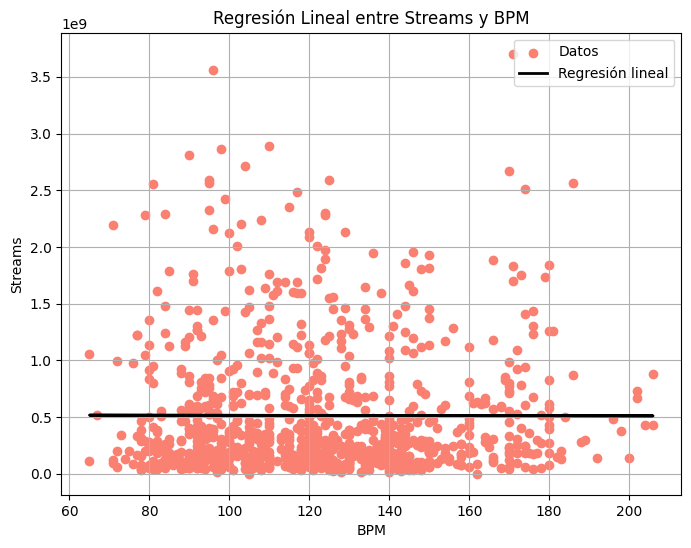

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-no2-hipotesis'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Consulta SQL
query = '''
SELECT streams_clean, bpm
FROM `proyecto-no2-hipotesis.tracks.master`
'''

# Ejecutar la consulta y guardar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Separar las datos en variables independientes (x) y dependientes (y)
x = df[['bpm']]
y = df['streams_clean']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(x, y)

# Imprimir la ecuación del modelo
print('\033[1m' + f'Ecuación del modelo: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}' + '\033[0m')

# Coeficientes del modelo de regresión lineal
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

# Generar las predicciones
y_pred = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)
print('Error cuadrático medio:', mse)

# Calcular el Estadístico R^2
r2 = r2_score(y, y_pred)
print('Estadístico R^2:', r2)

# Visualización de la gráfica de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='salmon', label='Datos')
plt.plot(x, model.predict(x), color='black', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal entre Streams y BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()


**Conclusión:**

---
La regresión lineal no parece poder explicar los valores de "Streams" en relación con la variable "BPM"

* *Ajuste del modelo:* El alto valor del Error Cuadrático Medio indica que el modelo no se ajusta bien a los datos.

* *Capacidad predictiva:* El Estadístico R^2 muy cercano a cero indica que los "BPM" tiene poco poder predictivo sobre los "Streams" en este modelo.

# Hipótesis 2
Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas.

Ecuación del modelo (Spotify Charts vs. Apple Charts): y = 1.43x + 34.77
Coeficiente: [1.42635394]
Intercepto: 34.76680455026715
Error cuadrático medio: 1782.857724445941
Estadístico R^2: 0.30441796172774804


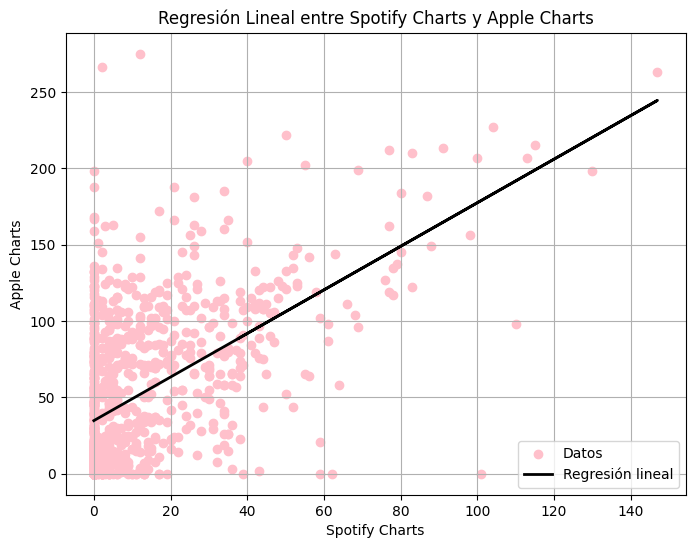

Ecuación del modelo (Spotify Charts vs. Deezer Charts): y = 0.19x + 0.41
Coeficiente: [0.18522766]
Intercepto: 0.40724775334512264
Error cuadrático medio: 22.737111306891265
Estadístico R^2: 0.366571113636619


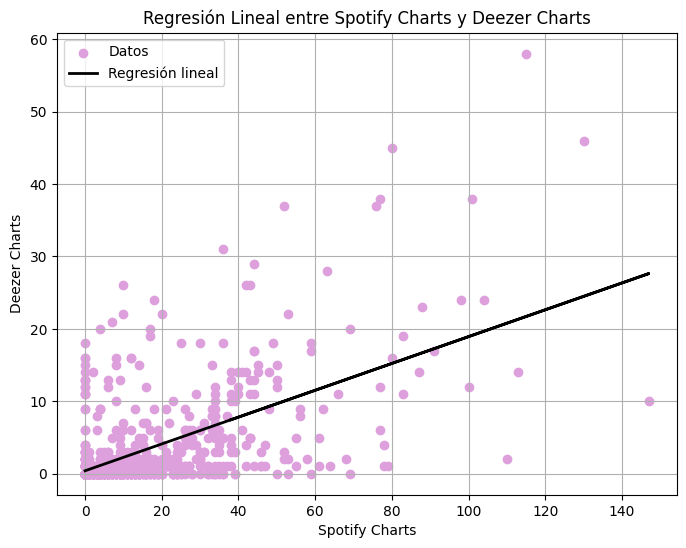

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-no2-hipotesis'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Consulta SQL para la primera regresión
query_1 = '''
SELECT in_spotify_charts, in_apple_charts
FROM `proyecto-no2-hipotesis.tracks.master`
'''

# Ejecutar la consulta y guardar los resultados en un DataFrame
df_1 = client.query(query_1).to_dataframe()

# Separar las datos en variables independientes (x) y dependientes (y) - Primera regresión
x_1 = df_1[['in_spotify_charts']]
y_1 = df_1['in_apple_charts']

# Crear un modelo de regresión lineal - Primera regresión
model_1 = LinearRegression()

# Entrenar el modelo con los datos - Primera regresión
model_1.fit(x_1, y_1)

# Imprimir la ecuación del modelo - Primera regresión
print('\033[1m' + f'Ecuación del modelo (Spotify Charts vs. Apple Charts): y = {model_1.coef_[0]:.2f}x + {model_1.intercept_:.2f}' + '\033[0m')

# Coeficientes del modelo de regresión lineal - Primera regresión
print('Coeficiente:', model_1.coef_)
print('Intercepto:', model_1.intercept_)

# Generar las predicciones - Primera regresión
y_pred_1 = model_1.predict(x_1)

# Calcular el Error Cuadrático Medio (MSE) - Primera regresión
mse_1 = mean_squared_error(y_1, y_pred_1)
print('Error cuadrático medio:', mse_1)

# Calcular el Estadístico R^2 - Primera regresión
r2_1 = r2_score(y_1, y_pred_1)
print('Estadístico R^2:', r2_1)

# Visualización de la gráfica de dispersión y la línea de regresión - Primera regresión
plt.figure(figsize=(8, 6))
plt.scatter(x_1, y_1, color='pink', label='Datos')
plt.plot(x_1, model_1.predict(x_1), color='black', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal entre Spotify Charts y Apple Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Apple Charts')
plt.legend()
plt.grid(True)
plt.show()

# Consulta SQL para la segunda regresión
query_2 = '''
SELECT in_spotify_charts, in_deezer_charts
FROM `proyecto-no2-hipotesis.tracks.master`
'''

# Ejecutar la consulta y guardar los resultados en un DataFrame
df_2 = client.query(query_2).to_dataframe()

# Separar las datos en variables independientes (x) y dependientes (y) - Segunda regresión
x_2 = df_2[['in_spotify_charts']]
y_2 = df_2['in_deezer_charts']

# Crear un modelo de regresión lineal - Segunda regresión
model_2 = LinearRegression()

# Entrenar el modelo con los datos - Segunda regresión
model_2.fit(x_2, y_2)

# Imprimir la ecuación del modelo - Segunda regresión
print('\033[1m' + f'Ecuación del modelo (Spotify Charts vs. Deezer Charts): y = {model_2.coef_[0]:.2f}x + {model_2.intercept_:.2f}' + '\033[0m')

# Coeficientes del modelo de regresión lineal - Segunda regresión
print('Coeficiente:', model_2.coef_)
print('Intercepto:', model_2.intercept_)

# Generar las predicciones - Segunda regresión
y_pred_2 = model_2.predict(x_2)

# Calcular el Error Cuadrático Medio (MSE) - Segunda regresión
mse_2 = mean_squared_error(y_2, y_pred_2)
print('Error cuadrático medio:', mse_2)

# Calcular el Estadístico R^2 - Segunda regresión
r2_2 = r2_score(y_2, y_pred_2)
print('Estadístico R^2:', r2_2)

# Visualización de la gráfica de dispersión y la línea de regresión - Segunda regresión
plt.figure(figsize=(8, 6))
plt.scatter(x_2, y_2, color='plum', label='Datos')
plt.plot(x_2, model_2.predict(x_2), color='black', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal entre Spotify Charts y Deezer Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Deezer Charts')
plt.legend()
plt.grid(True)
plt.show()


**Conclusión:**

---
> Ambos modelos muestran una relación positiva entre las variables, sin embargo es la segunda comparación, entre Spotify y Deezer Charts, la cual se ajusta mejor y explica una mayor proporción de la variabilidad de datos.

1. Spotify Charts & Apple Charts

Existe una relación lineal positiva moderada entre las variables "Spotify Charts" y "Apple Charts".

* *Ajuste del modelo:* El valor relativamente bajo del Error Cuadrático Medio sugiere que el modelo se ajusta razonablemente bien a los datos.

* *Capacidad predictiva:* El modelo explica aproximadamente el 30.44% de la variabilidad en las "Apple Charts" a partir de las "Spotify Charts".


2. Spotify Charts & Deezer Charts

Existe una relación lineal positiva entre las variables "Spotify Charts" y "Deezer Charts".

* *Ajuste del modelo:* El valor relativamente bajo del Error Cuadrático Medio sugiere que el modelo se ajusta razonablemente bien a los datos.

* *Capacidad predictiva:* El modelo explica aproximadamente el 36.65% de la variabilidad en las "Deezer Charts" a partir de las "Spotify Charts".


# Hipótesis 3
La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams.

Ecuación del modelo: y = 49764.73x + 232830838.04
Coeficiente: [49764.73317544]
Intercepto: 232830838.04319376
Error cuadrático medio: 1.2440535893195104e+17
Estadístico R^2: 0.6131449278785386


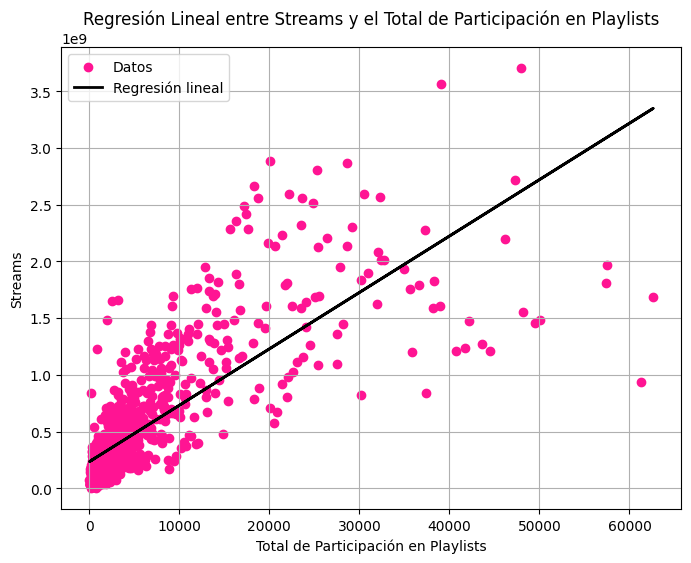

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-no2-hipotesis'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Consulta SQL
query = '''
SELECT streams_clean, total_playlist_participation
FROM `proyecto-no2-hipotesis.tracks.master`
'''

# Ejecutar la consulta y guardar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Separar las datos en variables independientes (x) y dependientes (y)
x = df[['total_playlist_participation']]
y = df['streams_clean']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(x, y)

# Imprimir la ecuación del modelo
print('\033[1m' + f'Ecuación del modelo: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}' + '\033[0m')

# Coeficientes del modelo de regresión lineal
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

# Generar las predicciones
y_pred = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)
print('Error cuadrático medio:', mse)

# Calcular el Estadístico R^2
r2 = r2_score(y, y_pred)
print('Estadístico R^2:', r2)

# Visualización de la gráfica de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='deeppink', label='Datos')
plt.plot(x, model.predict(x), color='black', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal entre Streams y el Total de Participación en Playlists')
plt.xlabel('Total de Participación en Playlists')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()


**Conclusión:**

---
Existe una relación positiva entre "Streams" y "Total de participación en playlists", donde cada aumento en el valor total de participación en listas de reproducción está asociado con un aumento en los streams.

* *Ajuste del modelo:* A pesar del alto valor del Error Cuadrático Medio el ajuste es razonable.

* *Capacidad predictiva:* El modelo explica aproximadamente el 61.31% de la variabilidad en los "Streams" a partir del "Total de participación en playlists".

# Hipótesis 4
Los artistas con un mayor número de canciones en Spotify tienen más streams totales.

Ecuación del modelo: y = -4336806.27x + 597769420.89
Coeficiente: [-4336806.27354411]
Intercepto: 597769420.8896888
Error cuadrático medio: 3.508317034578064e+17
Estadístico R^2: 0.004435334189159645


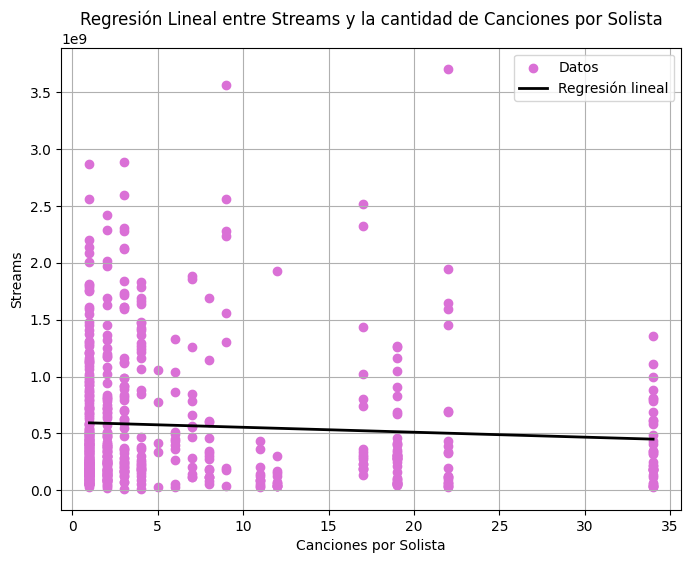

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-no2-hipotesis'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Consulta SQL
query = '''
SELECT streams_clean, solos
FROM `proyecto-no2-hipotesis.tracks.master`
'''

# Ejecutar la consulta y guardar los resultados en un DataFrame
df = client.query(query).to_dataframe()
df = df.dropna(subset=['solos']) #Eliminar filas con valores NaN en 'solos'

# Separar las datos en variables independientes (x) y dependientes (y)
x = df[['solos']]
y = df['streams_clean']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(x, y)

# Imprimir la ecuación del modelo
print('\033[1m' + f'Ecuación del modelo: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}' + '\033[0m')

# Coeficientes del modelo de regresión lineal
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

# Generar las predicciones
y_pred = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y, y_pred)
print('Error cuadrático medio:', mse)

# Calcular el Estadístico R^2
r2 = r2_score(y, y_pred)
print('Estadístico R^2:', r2)

# Visualización de la gráfica de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orchid', label='Datos')
plt.plot(x, model.predict(x), color='black', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal entre Streams y la cantidad de Canciones por Solista')
plt.xlabel('Canciones por Solista')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()


**Conclusión:**

---
La regresión lineal entre "Canciones por solista" y "Streams" es mínima y prácticamente no significativa.

El modelo no es capaz de explicar o predecir adecuadamente las variaciones en los streams apartir del número de canciones por solista.

# Hipótesis 5
Las características* de la música influyen en el éxito en términos de cantidad de streams en Spotify.
<br></br>
*Danceability, Valence, Energy, Acousticness, Instrumentalness, Liveness, Speechiness

Ecuación del modelo (Streams vs Danceability %): y = -4106468.84x + 789097217.63
Coeficiente: [-4106468.83770926]
Intercepto: 789097217.6293414
Error cuadrático medio: 3.1797285815813395e+17
Estadístico R^2: 0.011220947140086479


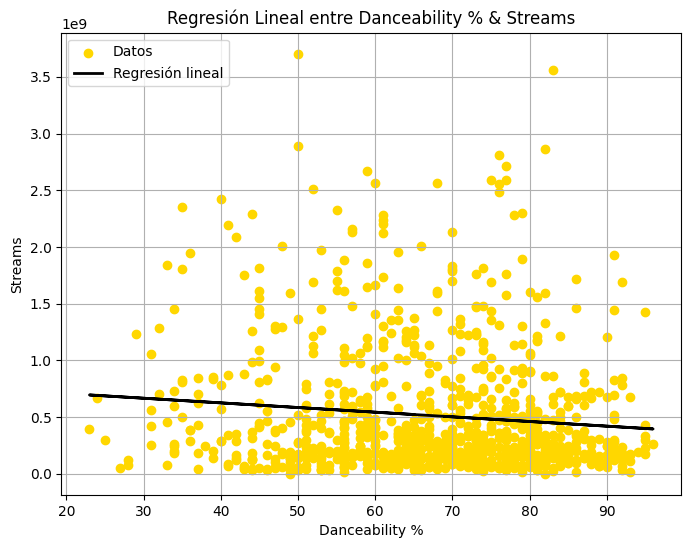

Ecuación del modelo (Streams vs Valence %): y = -988742.37x + 564902108.69
Coeficiente: [-988742.37388987]
Intercepto: 564902108.6902145
Error cuadrático medio: 3.2104253994664275e+17
Estadístico R^2: 0.0016753618061533526


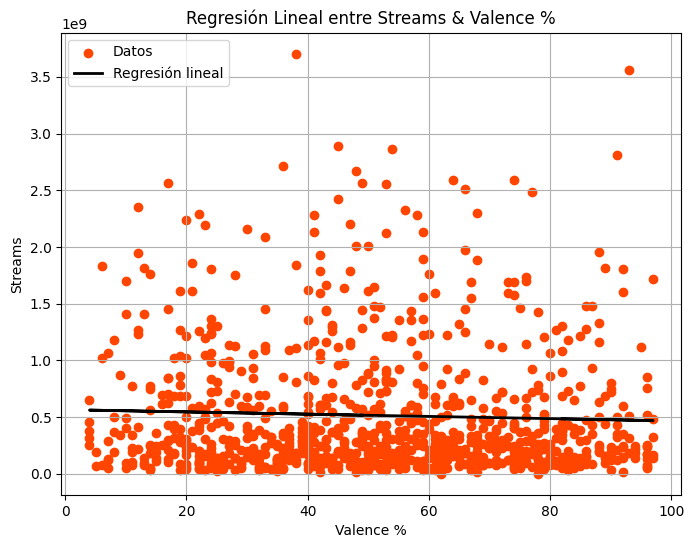

Ecuación del modelo (Streams vs Energy): y = -890078.25x + 571301218.90
Coeficiente: [-890078.25416241]
Intercepto: 571301218.9032174
Error cuadrático medio: 3.2136411685478835e+17
Estadístico R^2: 0.0006753754787047761


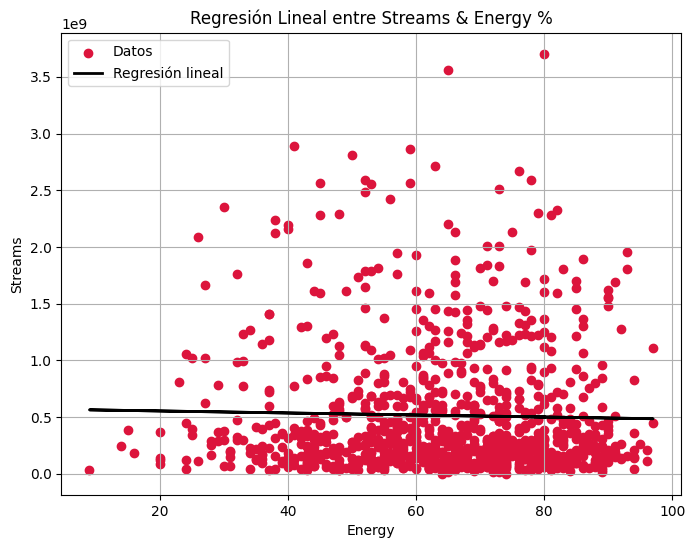

Ecuación del modelo (Streams vs Acousticness): y = -98190.57x + 516777818.05
Coeficiente: [-98190.57197496]
Intercepto: 516777818.05496734
Error cuadrático medio: 3.215747868072999e+17
Estadístico R^2: 2.026913624220139e-05


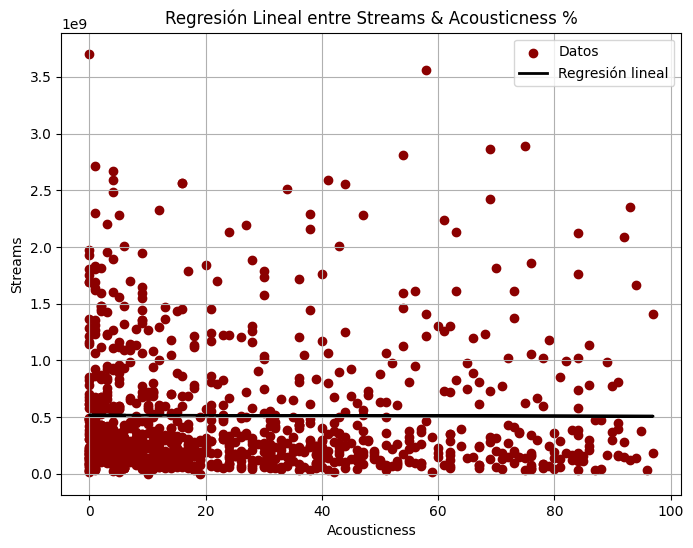

Ecuación del modelo (Streams vs Instrumentalness): y = -3024813.28x + 518913405.53
Coeficiente: [-3024813.27993248]
Intercepto: 518913405.52616656
Error cuadrático medio: 3.2093291951951136e+17
Estadístico R^2: 0.0020162411590042284


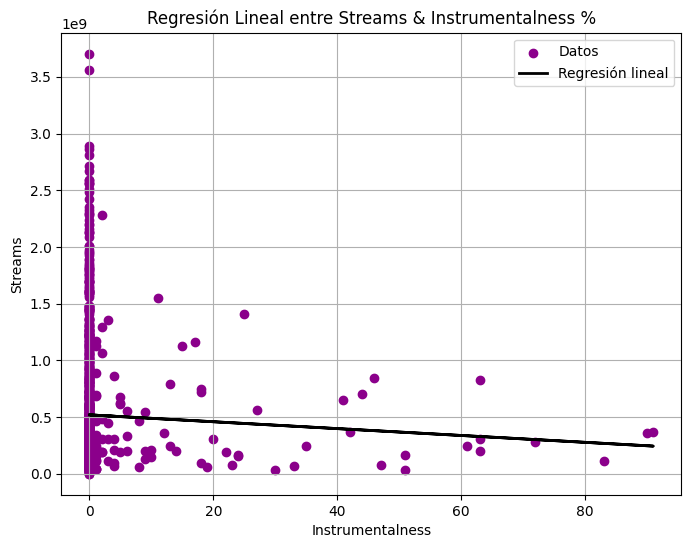

Ecuación del modelo (Streams vs Liveness): y = -2018888.52x + 550854617.28
Coeficiente: [-2018888.52256714]
Intercepto: 550854617.2790955
Error cuadrático medio: 3.2081450689262656e+17
Estadístico R^2: 0.0023844610307756087


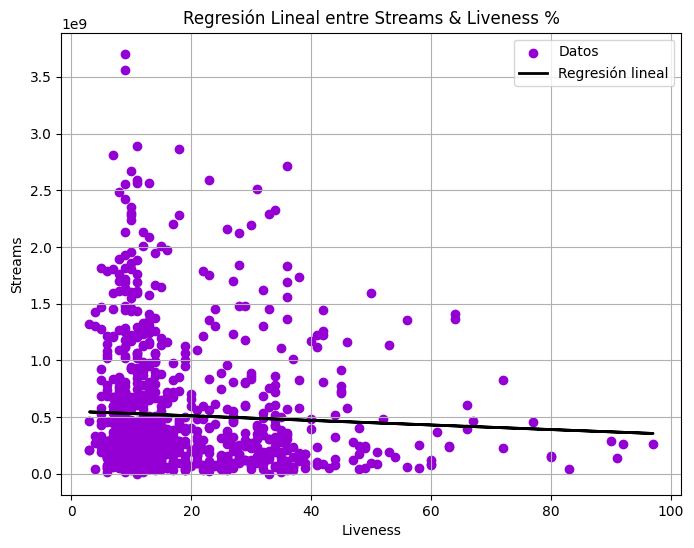

Ecuación del modelo (Streams vs Speechiness): y = -6415920.21x + 579186034.64
Coeficiente: [-6415920.2145317]
Intercepto: 579186034.6358031
Error cuadrático medio: 3.1753042555164224e+17
Estadístico R^2: 0.01259675039617325


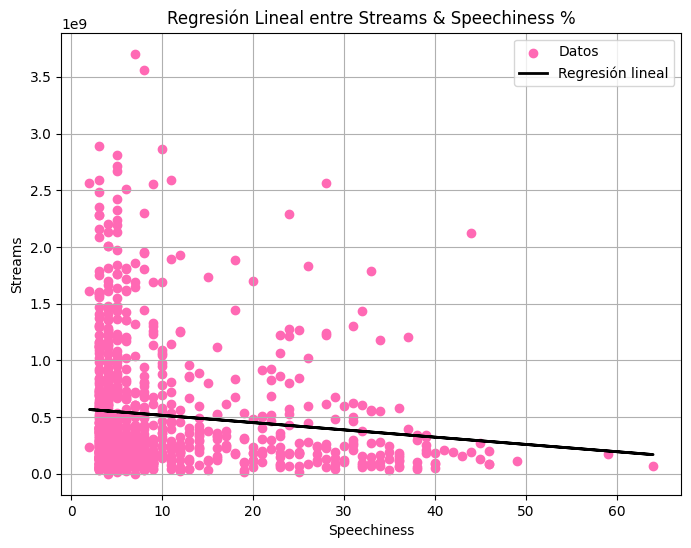

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'proyecto-no2-hipotesis'

# Conexión con BigQuery
client = bigquery.Client(project=project_id)

# Función definida para llamar diferentes combinaciones de variables
def linear_regression(query_column, x_label, y_label, plot_title, color_points, color_line):
    # Consulta SQL
    query = f'''
    SELECT streams_clean, {query_column}
    FROM `proyecto-no2-hipotesis.tracks.master`
    '''

    # Ejecutar la consulta y guardar los resultados en un DataFrame
    df = client.query(query).to_dataframe()

    # Separar las datos en variables independientes (x) y dependientes (y)
    x = df[[query_column]]
    y = df['streams_clean']

    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo con los datos
    model.fit(x, y)

    # Imprimir la ecuación del modelo
    print('\033[1m' + f'Ecuación del modelo (Streams vs {x_label}): y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}' + '\033[0m')

    # Coeficientes del modelo de regresión lineal
    print('Coeficiente:', model.coef_)
    print('Intercepto:', model.intercept_)

    # Generar las predicciones
    y_pred = model.predict(x)

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y, y_pred)
    print('Error cuadrático medio:', mse)

    # Calcular el Estadístico R^2
    r2 = r2_score(y, y_pred)
    print('Estadístico R^2:', r2)

    # Visualización de la gráfica de dispersión y la línea de regresión
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=color_points, label='Datos')
    plt.plot(x, model.predict(x), color=color_line, linewidth=2, label='Regresión lineal')
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplos de llamadas a la función: 1. Danceability, 2. Valence, 3. Energy, 4. Acousticness, 5. Instrumentalness, 6. Liveness, 7. Speechiness
linear_regression('danceability__', 'Danceability %', 'Streams', 'Regresión Lineal entre Danceability % & Streams', 'gold', 'black')
linear_regression('valence__', 'Valence %', 'Streams', 'Regresión Lineal entre Streams & Valence %', 'orangered', 'black')
linear_regression('energy__', 'Energy', 'Streams', 'Regresión Lineal entre Streams & Energy %', 'crimson', 'black')
linear_regression('acousticness__', 'Acousticness', 'Streams', 'Regresión Lineal entre Streams & Acousticness %', 'darkred', 'black')
linear_regression('instrumentalness__', 'Instrumentalness', 'Streams', 'Regresión Lineal entre Streams & Instrumentalness %', 'darkmagenta', 'black')
linear_regression('liveness__', 'Liveness', 'Streams', 'Regresión Lineal entre Streams & Liveness %', 'darkviolet', 'black')
linear_regression('speechiness__', 'Speechiness', 'Streams', 'Regresión Lineal entre Streams & Speechiness %', 'hotpink', 'black')


**Conclusión:**

---
> No parece que alguna de las características musicales (Danceability, Valence, Energy, Acousticness, Instrumentalness, Liveness, Speechiness) tengan una influencia o predicción significativa sobre la cantidad de "Streams".